# More Distributions and the Central Limit Theorem

## Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
amir_deals = pd.read_csv('../data/amir_deals.csv')
amir_deals.sample(2)

,Unnamed: 0,product,client,status,amount,num_users
13,14,Product F,New,Won,4918.79,43
100,101,Product H,Current,Won,6201.23,48


In [24]:
all_deals = pd.DataFrame({
    'product' : ["3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247",  "3544",  "5073",  "6149",  "7863",  "14",  "10247", ],
    'num_users': [19, 43, 87, 83, 17, 2, 29, 13, 80, 23, 26, 6, 15, 43, 41, 12, 58, 7, 34, 45, 19, 2, 82, 23, 31, 16, 53, 26, 73, 1, 66, 13, 14, 3, 33, 52, 32, 53, 37, 47, 99, 89, 50, 40, 17, 17, 2, 65, 19, 79, 74, 42, 48, 12, 24, 24, 42, 17, 90, 6, 2, 27, 3, 94, 59, 50, 51, 19, 7, 2, 51, 55, 78, 42, 9, 3, 39, 27, 42, 22, 38, 43, 68, 3, 24, 1, 10, 3, 82, 65, 17, 2, 92, 35, 73, 18, 39, 35, 33, 23, 48, 63, 63, 14, 39, 47, 13, 99, 56, 22, 44, 24, 12, 4, 18, 58, 81, 12, 85, 37, 96, 12, 16, 1, 65, 44, 16, 7, 80, 53, 82, 25, 90, 98, 29, 67, 32, 89, 11, 9, 45, 8, 17, 72, 89, 63, 68, 23, 52, 36, 17, 2, 71, 54, 8, 5, 58, 5, 20, 29, 60, 31, 59, 31, 29, 6, 11, 9, 8, 5, 59, 66, 55, 23, 12, 28, 34, 72, 28, 84, 15, 80, 23, 16, 5, 94, 4, 61, 50, 84, 53, 21, 26, 50, 33, 65, 69, 93, 29, 3, 49, 29, 29, 97, 62, 12, 4, 13, 33, 45, 28, 5, 33, 67, 86, 51, 26, 13, 96, 25, 81, 54, 87, 21, 46, 45, 42, 81, 99, 14, 7, 9, 16, 99, 2, 10, 22, 54, 33, 14, 33, 74, 36, 40, 52, 6, 65, 4, 83, 31, 10, 14, 2, 74, 21, 62, 19, 11, 93, 58, 83, 4, 66, 40, 30, 15, 32, 20, 33, 7, 33, 26, 90, 16, 63, 15, 85, 87, 5, 13, 6, 1, 76, 43, 62, 1, 96, 56, 32, 62, 28, 87, 21, 15, 39, 56, 18, 3, 9, 7, 56, 44, 7, 38, 8, 10, 88, 63, 57, 20, 90, 49, 11, 26, 43, 8, 1, 11, 41, 4, 47, 42, 29, 3, 1, 37, 34, 19, 2, 74, 90, 61, 15, 58, 23, 4, 53, 6, 22, 76, 17, 10, 75, 6, 4, 25, 27, 20, 33, 59, 10, 31, 73, 56, 99, 9, 30, 30, 78, 37, 1, 60, 41, 28, 1, 39, 14, 46, 25, 29, 83, 78, 55, 40, 17, 25, 1, 20, 23, 12, 12, 3, 1, 12, 61, 41, 58, 6, 61, 45, 77, 28, 3, 24, 67, 55, 33, 41, 55, 35, 85, 9, 30, 11, 11, 8, 2, 45, 47, 22, 85, 1, 5, 4, 72, 88, 94, 44, 60, 36, 7, 11, 24, 62, 33, 62, 1, 79, 29, 13, 4, 74, 91, 59, 79, 37, 62, 13, 7, 67, 32, 65, 22, 19, 24, 10, 5, 12, 8, 18, 4, 36, 22, 15, 57, 14, 8, 11, 3, 1, 57, 27, 82, 41, 74, 50, 71, 48, 32, 76, 10, 36, 87, 43, 33, 37, 19, 19, 58, 28, 83, 10, 8, 13, 11, 31, 33, 69, 1, 22, 62, 4, 32, 2, 77, 58, 92, 95, 38, 86, 14, 46, 30, 9, 14, 8, 25, 33, 8, 34, 3, 46, 5, 33, 36, 10, 58, 49, 3, 51, 14, 16, 34, 19, 48, 83, 22, 11, 3, 49, 13, 34, 80, 49, 48, 66, 5, 91, 65, 9, 25, 37, 9, 2, 93, 30, 18, 36, 18, 54, 3, 5, 24, 23, 39, 96, 39, 15, 70, 38, 10, 39, 7, 0, 24, 3, 39, 5, 96, 71, 25, 9, 28, 13, 73, 9, 59, 66, 78, 78, 69, 37, 9, 60, 47, 30, 17, 68, 36, 45, 54, 57, 5, 40, 56, 39, 32, 99, 81, 8, 45, 55, 47, 76, 30, 6, 74, 23, 26, 5, 67, 27, 6, 37, 23, 22, 53, 46, 6, 87, 18, 90, 64, 26, 13, 32, 1, 79, 7, 9, 60, 68, 34, 41, 63, 22, 28, 66, 15, 51, 0, 8, 15, 15, 2, 71, 97, 82, 46, 45, 26, 4, 19, 69, 46, 77, 47, 34, 44, 67, 62, 6, 10, 34, 5, 17, 48, 10, 2, 11, 66, 56, 5, 9, 22, 93, 29, 65, 23, 28, 9, 77, 20, 1, 5, 4, 85, 3, 25, 20, 22, 0, 6, 1, 82, 45, 44, 5, 15, 57, 5, 37, 30, 43, 53, 47, 11, 12, 4, 11, 2, 47, 7, 16, 25, 93, 62, 46, 16, 67, 4, 10, 25, 45, 83, 20, 20, 12, 17, 40, 43, 39, 38, 13, 67, 4, 32, 5, 2, 21, 20, 55, 81, 2, 66, 71, 68, 39, 81, 53, 74, 35, 7, 30, 72, 58, 21, 67, 1, 6, 38, 6, 70, 44, 69, 30, 77, 80, 28, 58, 9, 28, 8, 33, 24, 82, 74, 8, 95, 15, 44, 20, 98, 70, 39, 17, 10, 60, 55, 13, 49, 30, 28, 43, 23, 48, 40, 12, 41, 44, 15, 96, 41, 7, 17, 64, 77, 6, 58, 68, 34, 97, 36, 9, 50, 28, 27, 5, 10, 5, 83, 89, 1, 33, 13, 26, 8, 31, 25, 83, 30, 2, 15, 28, 77, 4, 44, 5, 44, 49, 7, 65, 5, 4, 19, 63, 99, 13, 44, 25, 69, 9, 16, 72, 63, 8, 8, 57, 56, 66, 61, 68, 17, 30, 58, 67, 29, 17, 85, 6, 29, 84, 6, 1, 94, 5, 13, 41, 59, 82, 76, 34, 89, 22, 61, 79, 65, 97, 45, 42, 55, 14, 11, 66, 28, 62, 80, 95, 26, 32, 4, 46, 7, 34, 19, 54, 1, 3, 30, 44, 7, 22, 38, 38, 6, 57, 90, 98, 22, 19, 43, 7, 37, 9, 36, 74, 14, 26, 92, 42, 10, 75, 47, 97, 70, 74, 2, 93, 6, 26, 47, 9, 4, 21, 28, 95, 63, 3, 6, 44, 35, 16, 34, 17, 5, 35, 16, 33, 10, 72, 0, 11, 91, 62, 10, 31, 7, 62, 63, 82, 12, 5, 63, 39, 29, 31, 31, 3, 51, 85, 66, 53, 6, 17, 80, 13, 4, 96, 86, 46, 51, 26, 64, 14, 0, 38, 16, 37, 16, 15, 12, 19, 0, 49, 23, 65, 49, 92, 63, 18, 10, 9, 97, 64, 2, 41, 17, 8, 43, 7, 48, 92, 36, 41, 46, 30, 67, 9, 24, 95, 74, 21, 32, 6, 1, 19, 20, 39, 24, 30, 45, 61, 10, 91, 42, 23, 18, 76, 3, 63, 61, 88, 19, 91, 47, 13, 67, 12, 36, 9, 22, 41, 76, 9, 9, 83, 66, 79, 77, 20, 34, 56, 3, 59, 19, 16, 55, 38, 81, 1, 15, 71, 67, 13, 1, 17, 9, 10, 31, 70, 9, 31, 27, 27, 1, 21, 39, 1, 19, 98, 63, 25, 6, 52, 83, 8, 32, 78, 3, 65, 55, 10, 9, 98, 6, 8, 42, 6, 7, 15, 14, 64, 1, 51, 5, 47, 93, 20, 4, 3, 22, 67, 24, 11, 26, 60, 9, 68, 19, 1, 27, 19, 75, 2, 1, 1, 36, 33, 4, 39, 71, 26, 9, 52, 58, 96, 15, 69, 36, 36, 4, 2, 2, 7, 85, 6, 65, 39, 9, 24, 52, 8, 9, 66, 55, 6, 27, 2, 30, 47, 78, 1, 15, 64, 98, 70, 40, 27, 20, 11, 16, 20, 28, 18, 60, 99, 3, 32, 79, 9, 84, 18, 19, 90, 26, 18, 33, 5, 99, 10, 11, 18, 66, 63, 70, 8, 20, 8, 45, 91, 27, 49, 35, 43, 80, 1, 21, 39, 34, 46, 21, 30, 12, 3, 51, 9, 26, 20, 3, 78, 11, 10, 95, 3, 16, 57, 38, 97, 22, 33, 94, 30, 58, 52, 16, 40, 4, 22, 42, 5, 7, 58, 12, 68, 20, 37, 56, 97, 65, 1, 11, 63, 5, 10, 78, 81, 70, 95, 67, 70, 7, 2, 51, 11, 8, 17, 19, 27, 15, 7, 2, 47, 10, 63, 70, 16, 4, 84, 14, 99, 62, 98, 91, 59, 87, 6, 22, 66, 99, 29, 17, 21, 11, 85, 90, 58, 63, 96, 71, 25, 28, 4, 9, 32, 17, 4, 4, 16, 4, 29, 13, 5, 65, 80, 44, 17, 10, 35, 32, 81, 7, 7, 32, 17, 38, 17, 5, 18, 19, 93, 7, 40, 17, 84, 32, 8, 13, 71, 4, 17, 25, 58, 71, 37, 25, 11, 72, 36, 63, 63, 20, 60, 32, 65, 78, 8, 28, 35, 0, 28, 16, 29, 63, 89, 2, 94, 16, 7, 13, 9, 60, 82, 56, 5, 43, 45, 80, 13, 89, 54, 3, 34, 39, 28, 66, 1, 14, 12, 32, 5, 73, 65, 58, 10, 58, 20, 4, 67, 4, 20, 97, 60, 69, 88, 57, 21, 88, 81, 46, 46, 4, 39, 16, 24, 72, 66, 3, 11, 11, 8, 38, 16, 17, 13, 10, 61, 26, 7, 29, 15, 88, 17, 65, 45, 60, 64, 2, 56, 7, 17, 5, 15, 40, 7, 71, 73, 12, 60, 16, 8, 11, 47, 8, 17, 6, 91, 14, 43, 64, 76, 80, 74, 26, 53, 69, 4, 19, 0, 71, 11, 3, 21, 56, 20, 89, 88, 31, 44, 68, 6, 92, 71, 14, 60, 46, 3, 97, 9, 31, 63, 13, 55, 13, 4, 22, 38, 12, 63, 54, 49, 65, 2, 66, 3, 76, 50, 62, 51, 8, 69, 1, 28, 1, 58, 3, 64, 17, 79, 51, 39, 7, 47, 93, 12, 94, 46, 74, 37, 78, 29, 22, 83, 21, 3, 83, 15, 49, 36, 41, 14, 40, 4, 20, 3, 14, 1, 37, 36, 85, 38, 14, 18, 35, 98, 49, 29, 17, 8, 39, 33, 28, 22, 8, 1, 25, 78, 80, 6, 21, 9, 20, 16, 52, 50, 37, 38, 34, 5, 71, 3, 67, 7, 87, 48, 12, 28, 6, 10, 34, 47, 4, 26, 13, 5, 80, 25, 61, 50, 23, 81, 15, 29, 24, 71, 8, 51, 7, 90, 67, 12, 50, 30, 62, 85, 4, 68, 12, 30, 60, 36, 21, 5, 22, 36, 46, 99, 1, 30, 13, 75, 37, 62, 95, 77, 26, 16, 44, 49, 47, 84, 5, 95, 78, 2, 46, 19, 14, 16, 82, 6, 9, 50, 53, 64, 29, 46, 81, 91, 10, 56, 51, 15, 32, 4, 43, 11, 21, 65, 20, 5, 12, 35, 88, 9, 38, 39, 11, 6, 22, 59, 18, 7, 44, 9, 25, 10, 37, 62, 26, 4, 19, 27, 78, 48, 60, 22, 19, 9, 68, 23, 14, 39, 62, 83, 34, 12, 50, 4, 7, 26, 41, 48, 59, 28, 94, 4, 3, 26, 10, 23, 80, 40, 6, 28, 64, 38, 22, 26, 22, 5, 39, 74, 73, 21, 12, 44, 92, 72, 77, 38, 24, 59, 50, 28, 4, 17, 15, 66, 27, 21, 18, 24, 21, 11, 70, 5, 88, 15, 6, 46, 9, 40, 47, 71, 28, 35, 11, 75, 35, 4, 5, 51, 7, 9, 14, 51, 6, 10, 5, 23, 11, 16, 24, 37, 45, 14, 54, 6, 51, 13, 74, 40, 23, 32, 31, 5, 3, 35, 68, 44, 18, 31, 77, 28, 59, 77, 16, 14, 68, 63, 56, 86, 71, 10, 88, 56, 25, 66, 60, 55, 70, 16, 90, 18, 53, 49, 79, 31, 34, 19, 40, 34, 63, 7, 37, 39, 84, 8, 75, 21, 51, 8, 36, 93, 25, 10, 23, 15, 5, 51, 31, 99, 51, 11, 24, 73, 84, 35, 96, 34, 30, 19, 21, 2, 29, 81, 88, 63, 61, 36, 14, 3, 29, 59, 3, 9, 43, 32, 70, 78, 71, 21, 44, 20, 87, 71, 17, 66, 61, 60, 64, 45, 43, 14, 88, 57, 32, 28, 8, 43, 16, 10, 2, 18, 50, 87, 42, 23, 7, 1, 19, 71, 55, 64, 8, 70, 99, 67, 27, 1, 12, 59, 7, 22, 17, 10, 38, 44, 37, 9, 56, 12, 37, 87, 45, 17, 9, 7, 92, 73, 18, 76, 55, 14, 46, 45, 3, 48, 11, 1, 60, 41, 40, 48, 8, 11, 84, 54, 20, 70, 61, 82, 75, 24, 29, 62, 19, 50, 6, 43, 4, 26, 12, 88, 28, 24, 25, 43, 25, 2, 14, 4, 58, 68, 9, 24, 3, 2, 28, 2, 88, 56, 35, 63, 38, 11, 84, 80, 1, 45, 49, 14, 26, 37, 41, 91, 82, 17, 51, 2, 86, 49, 83, 77, 14, 19, 98, 88, 62, 34, 7, 6, 63, 9, 96, 2, 16, 22, 18, 18, 79, 34, 9, 37, 33, 94, 3, 80, 31, 66, 38, 1, 10, 3, 96, 18, 27, 10, 29, 27, 1, 7, 38, 19, 4, 87, 2, 16, 13, 16, 11, 31, 49, 14, 23, 55, 6, 21, 35, 14, 47, 76, 93, 75, 71, 36, 42, 29, 21, 9, 52, 18, 76, 13, 75, 88, 13, 51, 22, 50, 7, 1, 92, 4, 78, 27, 39, 25, 36, 12, 10, 9, 5, 26, 37, 34, 36, 43, 6, 74, 35, 14, 2, 62, 24, 7, 48, 6, 25, 92, 54, 49, 7, 72, 23, 3, 58, 48, 39, 49, 26, 9, 57, 85, 93, 59, 27, 8, 9, 49, 23, 71, 77, 32, 32, 54, 12, 63, 8, 27, 35, 0, 55, 35, 42, 29, 31, 39, 14, 36, 18, 26, 18, 15, 97, 88, 1, 74, 9, 75, 67, 79, 24, 78, 9, 11, 96, 89, 27, 11, 16, 77, 55, 23, 17, 24, 24, 86, 33, 64, 7, 12, 28, 23, 35, 27, 2, 52, 4, 31, 14, 43, 31, 12, 75, 1, 32, 40, 34, 47, 81, 79, 71, 16, 68, 68, 73, 42, 76, 28, 55, 58, 13, 19, 75, 29, 34, 33, 34, 13, 7, 66, 89, 57, 16, 87, 87, 54, 26, 79, 4, 57, 24, 7, 13, 15, 37, 8, 10, 5, 55, 37, 34, 83, 64, 1, 14, 52, 27, 58, 17, 88, 68, 78, 37, 11, 17, 34, 5, 32, 10, 5, 72, 25, 94, 89, 90, 32, 65, 91, 57, 59, 82, 63, 53, 1, 38, 27, 37, 69, 3, 13, 91, 35, 65, 78, 29, 70, 18, 27, 75, 4, 14, 35, 95, 93, 12, 14, 39, 3, 50, 23, 38, 25, 33, 96, 1, 45, 5, 16, 27, 1, 45, 37, 83, 5, 18, 7, 26, 18, 3, 51, 33, 95, 13, 8, 13, 51, 43, 46, 18, 9, 9, 27, 30, 57, 27, 89, 2, 35, 5, 91, 26, 13, 18, 7, 5, 15, 39, 71, 6, 6, 75, 61, 22, 15, 11, 7, 36, 60, 19, 86, 39, 87, 34, 20, 28, 79, 40, 67, 49, 57, 25, 75, 21, 37, 88, 22, 35, 22, 56, 96, 23, 26, 39, 22, 45, 53, 38, 29, 97, 3, 3, 4, 52, 65, 0, 49, 5, 11, 37, 0, 54, 18, 42, 3, 47, 18, 61, 11, 84, 11, 18, 75, 58, 14, 30, 20, 14, 21, 4, 8, 48, 40, 70, 74, 2, 38, 11, 18, 1, 6, 18, 35, 14, 34, 90, 93, 39, 72, 52, 47, 18, 37, 5, 41, 53, 39, 54, 85, 53, 10, 59, 58, 39, 4, 43, 31, 48, 14, 62, 57, 78, 5, 9, 29, 10, 51, 5, 27, 6, 28, 28, 29, 34, 40, 4, 2, 69, 77, 44, 34, 71, 31, 2, 11, 35, 52, 12, 13, 26, 77, 36, 51, 46, 21, 19, 20, 30, 33, 67, 93, 26, 40, 27, 46, 8, 19, 9, 35, 71, 2, 70, 19, 85, 13, 90, 60, 4, 97, 6, 30, 90, 25, 52, 3, 5, 21, 1, 60, 83, 34, 35, 65, 80, 6, 23, 23, 44, 58, 60, 53, 58, 42, 38, 11, 87, 9, 79, 34, 3, 28, 10, 56, 48, 37, 45, 36, 8, 44, 52, 90, 23, 15, 15, 57, 60, 34, 9, 28, 41, 8, 7, 7, 1, 76, 69, 11, 1, 34, 9, 65, 15, 8, 6, 27, 6, 5, 58, 21, 29, 36, 49, 22, 3, 5, 13, 77, 22, 12, 23, 15, 71, 4, 78, 1, 34, 65, 5, 58, 60, 75, 84, 80, 30, 69, 14, 86, 23, 74, 24, 40, 48, 1, 95, 54, 8, 5, 27, 10, 26, 24, 98, 80, 55, 17, 0, 6, 22, 19, 31, 54, 69, 59, 16, 12, 36, 5, 3, 19, 88, 31, 33, 29, 11, 9, 8, 91, 77, 87, 44, 9, 48, 5, 24, 34, 53, 47, 28, 7, 52, 77, 66, 4, 31, 90, 63, 69, 46, 7, 61, 4, 44, 43, 28, 62, 6, 29, 15, 87, 20, 27, 72, 59, 72, 1, 58, 11, 94, 70, 5, 40, 95, 55, 87, 52, 19, 8, 43, 29, 19, 75, 10, 46, 29, 88, 85, 17, 44, 10, 70, 5, 39, 27, 20, 39, 51, 10, 52, 23, 45, 20, 41, 34, 56, 46, 83, 77, 90, 96, 95, 30, 42, 47, 91, 12, 51, 56, 15, 28, 53, 15, 3, 86, 31, 11, 26, 4, 50, 25, 25, 84, 43, 62, 11, 7, 46, 28, 31, 56, 62, 41, 34, 73, 14, 2, 10, 96, 2, 4, 13, 19, 71, 29, 6, 38, 40, 47, 41, 10, 14, 23, 30, 92, 32, 9, 29, 74, 34, 6, 10, 7, 25, 55, 81, 15, 82, 59, 40, 68, 52, 19, 5, 11, 63, 96, 92, 21, 53, 12, 20, 96, 18, 15, 18, 12, 33, 35, 63, 17, 37, 12, 7, 9, 46, 4, 56, 29, 4, 30, 5, 55, 19, 25, 89, 3, 57, 54, 66, 4, 10, 95, 6, 17, 16, 6, 90, 11, 15, 56, 14, 6, 34, 6, 5, 66, 97, 25, 11, 81, 2, 2, 3, 24, 2, 20, 6, 19, 75, 25, 60, 56, 25, 84, 41, 83, 81, 8, 3, 24, 4, 33, 12, 18, 60, 83, 29, 21, 46, 3, 47, 25, 87, 25, 17, 29, 49, 3, 18, 17, 3, 33, 84, 55, 16, 93, 15, 12, 23, 87, 85, 99, 51, 67, 77, 94, 22, 13, 41, 40, 89, 8, 36, 91, 13, 6, 54, 37, 37, 10, 34, 17, 36, 14, 4, 53, 38, 60, 6, 72, 15, 86, 3, 40, 39, 97, 27, 31, 81, 60, 86, 16, 27, 5, 20, 38, 1, 39, 18, 20, 60, 63, 10, 66, 11, 97, 56, 80, 94, 48, 3, 29, 27, 81, 59, 17, 12, 43, 11, 1, 75, 58, 18, 0, 50, 42, 7, 98, 69, 98, 86, 95, 4, 13, 12, 5, 12, 89, 97, 7, 15, 26, 9, 63, 5, 37, 46, 9, 45, 9, 49, 36, 14, 97, 89, 20, 11, 26, 50, 5, 97, 57, 20, 41, 3, 45, 25, 49, 30, 29, 11, 34, 32, 2, 5, 4, 10, 99, 53, 12, 40, 3, 43, 20, 13, 91, 47, 15, 16, 19, 73, 52, 73, 8, 2, 40, 83, 23, 9, 96, 28, 41, 8, 22, 79, 16, 48, 64, 8, 68, 36, 68, 25, 39, 30, 6, 46, 56, 29, 93, 1, 18, 54, 55, 48, 1, 16, 75, 21, 22, 99, 16, 25, 26, 19, 2, 9, 33, 19, 50, 53, 88, 44, 8, 23, 15, 47, 1, 41, 37, 40, 76, 58, 13, 61, 53, 97, 34, 96, 93, 12, 7, 82, 38, 54, 40, 7, 48, 49, 93, 94, 55, 3, 9, 97, 60, 83, 21, 45, 15, 35, 85, 44, 21, 12, 4, 31, 51, 97, 63, 64, 22, 34, 18, 74, 4, 55, 1, 9, 42, 54, 96, 25, 44, 7, 9, 5, 29, 44, 12, 17, 26, 60, 48, 44, 84, 48, 16, 64, 1, 27, 24, 53, 1, 29, 76, 50, 48, 11, 4, 85, 82, 6, 45, 27, 58, 89, 45, 50, 13, 12, 52, 23, 9, 19, 79, 0, 12, 2, 5, 10, 59, 11, 25, 5, 15, 23, 25, 16, 59, 21, 60, 24, 70, 29, 60, 24, 85, 80, 10, 53, 9, 5, 62, 45, 56, 67, 7, 69, 43, 31, 4, 98, 82, 52, 11, 14, 10, 4, 32, 92, 75, 0, 19, 14, 50, 46, 46, 58, 97, 71, 16, 29, 6, 76, 27, 72, 16, 56, 80, 4, 43, 44, 42, 99, 14, 88, 79, 80, 23, 41, 28, 27, 3, 6, 48, 15, 46, 2, 7, 15, 4, 14, 9, 1, 80, 11, 16, 11, 33, 68, 39, 28, 23, 45, 6, 44, 21, 29, 12, 4, 48, 81, 29, 52, 31, 4, 27, 34, 49, 30, 68, 40, 68, 48, 45, 43, 5, 72, 10, 12, 65, 6, 82, 84, 56, 6, 78, 1, 21, 21, 1, 28, 70, 12, 15, 72, 13, 30, 27, 68, 6, 74, 85, 14, 75, 66, 94, 97, 93, 4, 11, 22, 39, 89, 29, 11, 30, 13, 52, 11, 17, 89, 16, 29, 26, 66, 55, 7, 8, 7, 50, 69, 0, 32, 44, 53, 2, 43, 71, 28, 31, 14, 66, 27, 3, 2, 2, 31, 16, 17, 92, 17, 89, 36, 9, 17, 33, 24, 60, 59, 35, 19, 61, 9, 25, 4, 4, 2, 79, 85, 4, 50, 12, 34, 3, 31, 1, 52, 7, 13, 3, 41, 6, 20, 60, 53, 30, 72, 8, 66, 68, 35, 11, 1, 55, 34, 10, 55, 24, 12, 66, 85, 12, 24, 33, 4, 78, 34, 96, 43, 25, 9, 6, 72, 28, 83, 62, 18, 51, 27, 20, 48, 17, 27, 41, 43, 1, 83, 95, 3, 77, 77, 5, 27, 95, 60, 55, 37, 21, 93, 14, 99, 30, 5, 17, 33, 23, 38, 13, 46, 11, 85, 8, 15, 4, 51, 15, 97, 3, 64, 26, 24, 38, 72, 79, 2, 6, 3, 23, 10, 8, 19, 53, 85, 86, 18, 81, 89, 26, 98, 43, 69, 2, 2, 48, 13, 81, 81, 32, 59, 70, 14, 23, 22, 33, 14, 36, 20, 54, 22, 7, 52, 9, 4, 41, 26, 16, 18, 30, 13, 45, 4, 69, 66, 94, 6, 19, 23, 69, 31, 5, 34, 3, 6, 2, 67, 47, 37, 94, 18, 15, 58, 33, 8, 59, 30, 3, 40, 67, 24, 16, 22, 17, 32, 99, 97, 28, 16, 27, 13, 1, 76, 32, 90, 94, 38, 44, 17, 40, 19, 16, 6, 11, 6, 0, 34, 2, 58, 13, 48, 2, 30, 26, 60, 40, 14, 80, 36, 91, 2, 43, 52, 18, 89, 12, 44, 23, 24, 27, 16, 56, 9, 90, 59, 4, 76, 36, 23, 63, 42, 17, 9, 18, 16, 6, 63, 16, 20, 6, 64, 27, 87, 64, 13, 24, 8, 28, 41, 4, 64, 38, 5, 26, 39, 44, 69, 44, 3, 3, 93, 65, 57, 91, 39, 16, 13, 92, 5, 58, 63, 56, 18, 9, 61, 43, 69, 52, 27, 59, 1, 3, 34, 57, 10, 32, 48, 34, 12, 8, 23, 10, 76, 83, 8, 32, 61, 3, 53, 13, 8, 69, 12, 49, 50, 66, 6, 6, 54, 16, 54, 77, 32, 36, 65, 43, 2, 10, 2, 64, 66, 22, 69, 98, 39, 35, 2, 5, 98, 29, 58, 42, 14, 58, 22, 83, 29, 11, 85, 66, 50, 3, 13, 62, 32, 31, 46, 49, 41, 48, 10, 61, 56, 7, 15, 8, 20, 12, 19, 7, 46, 5, 89, 9, 71, 81, 24, 17, 3, 47, 13, 62, 67, 66, 52, 74, 49, 97, 1, 82, 46, 36, 9, 69, 17, 23, 12, 45, 25, 44, 12, 67, 71, 20, 33, 18, 72, 7, 6, 11, 78, 92, 64, 16, 13, 90, 53, 1, 27, 36, 73, 42, 10, 75, 42, 17, 7, 5, 6, 98, 9, 34, 7, 1, 50, 47, 39, 2, 58, 9, 25, 14, 28, 68, 9, 11, 43, 42, 43, 7, 37, 6, 6, 62, 7, 1, 11, 69, 3, 83, 34, 1, 41, 3, 34, 81, 48, 4, 4, 6, 14, 45, 19, 6, 26, 14, 20, 15, 36, 55, 68, 20, 41, 52, 35, 69, 40, 2, 33, 71, 80, 58, 20, 8, 1, 2, 24, 7, 12, 57, 93, 11, 2, 30, 20, 61, 65, 50, 75, 94, 83, 3, 5, 30, 42, 36, 39, 38, 14, 23, 13, 8, 3, 64, 17, 11, 89, 11, 8, 47, 97, 48, 34, 36, 36, 7, 23, 61, 65, 8, 20, 4, 9, 30, 17, 95, 8, 3, 9, 46, 94, 7, 16, 99, 24, 9, 36, 98, 41, 56, 74, 91, 79, 87, 50, 76, 4, 83, 6, 1, 49, 52, 68, 36, 77, 47, 6, 54, 17, 1, 6, 61, 29, 22, 32, 31, 1, 88, 93, 4, 9, 75, 8, 42, 19, 12, 76, 17, 76, 53, 24, 17, 79, 3, 29, 68, 47, 54, 3, 87, 8, 85, 45, 70, 64, 83, 8, 19, 72, 8, 91, 13, 22, 32, 13, 46, 7, 49, 20, 11, 43, 26, 97, 82, 22, 34, 11, 8, 41, 51, 54, 46, 38, 2, 41, 9, 3, 31, 57, 45, 78, 62, 92, 3, 18, 8, 16, 20, 44, 61, 14, 76, 81, 2, 72, 0, 3, 46, 2, 17, 79, 28, 13, 99, 30, 8, 27, 86, 53, 37, 13, 5, 39, 53, 74, 10, 5, 22, 54, 16, 92, 91, 41, 69, 92, 55, 41, 32, 5, 24, 31, 19, 74, 53, 91, 59, 68, 23, 30, 21, 0, 97, 14, 19, 39, 14, 14, 24, 12, 60, 12, 92, 28, 9, 34, 68, 9, 10, 34, 52, 46, 89, 51, 6, 90, 7, 6, 40, 25, 52, 2, 21, 4, 36, 1, 56, 72, 11, 45, 4, 76, 35, 24, 62, 41, 4, 21, 24, 11, 17, 27, 3, 13, 10, 9, 2, 99, 62, 71, 84, 6, 93, 25, 48, 2, 5, 26, 11, 43, 4, 86, 9, 84, 72, 94, 51, 15, 66, 13, 26, 71, 5, 4, 17, 15, 19, 33, 16, 14, 37, 10, 28, 8, 26, 2, 18, 47, 28, 12, 10, 13, 99, 8, 11, 4, 6, 42, 83, 19, 90, 27, 77, 48, 22, 8, 30, 22, 66, 21, 61, 66, 19, 18, 11, 35, 51, 65, 2, 40, 13, 6, 67, 89, 18, 27, 22, 50, 51, 16, 7, 63, 5, 19, 25, 50, 20, 38, 28, 15, 69, 21, 14, 3, 14, 94, 2, 70, 71, 13, 12, 36, 15, 25, 5, 90, 75, 48, 32, 44, 50, 20, 51, 18, 37, 54, 51, 36, 7, 65, 95, 16, 58, 80, 99, 88, 49, 29, 22, 69, 4, 18, 23, 1, 19, 9, 93, 92, 26, 27, 20, 20, 59, 55, 23, 36, 15, 58, 86, 45, 21, 13, 3, 1, 11, 6, 18, 73, 2, 8, 33, 28, 18, 85, 35, 5, 46, 34, 28, 29, 32, 27, 64, 53, 3, 41, 60, 50, 9, 39, 39, 9, 16, 70, 8, 14, 5, 7, 14, 42, 29, 72, 33, 19, 65, 34, 8, 86, 26, 16, 13, 51, 78, 10, 82, 69, 9, 32, 23, 39, 71, 65, 5, 13, 69, 12, 86, 45, 19, 29, 5, 53, 69, 41, 12, 3, 23, 48, 5, 48, 55, 60, 85, 26, 13, 6, 12, 10, 86, 2, 4, 16, 4, 92, 75, 8, 55, 4, 41, 65, 81, 61, 18, 7, 67, 15, 14, 3, 73, 33, 12, 21, 64, 11, 23, 27, 8, 9, 2, 78, 65, 92, 91, 2, 49, 6, 91, 39, 46, 86, 64, 25, 68, 5, 51, 9, 8, 67, 5, 21, 20, 29, 49, 77, 34, 4, 74, 74, 71, 12, 66, 4, 11, 24, 93, 69, 73, 32, 62, 71, 10, 42, 16, 21, 12, 11, 75, 27, 49, 0, 4, 27, 78, 17, 77, 16, 84, 12, 7, 64, 96, 16, 36, 52, 19, 9, 28, 13, 16, 25, 7, 9, 26, 81, 81, 29, 37, 92, 50, 42, 2, 99, 44, 83, 9, 32, 34, 62, 75, 75, 13, 20, 6, 32, 72, 16, 43, 60, 14, 41, 46, 9, 31, 67, 19, 15, 4, 12, 76, 48, 39, 8, 33, 9, 55, 18, 35, 57, 22, 79, 9, 49, 47, 69, 92, 41, 22, 11, 54, 4, 42, 14, 4, 91, 2, 35, 28, 21, 12, 4, 24, 30, 35, 80, 20, 6, 32, 40, 67, 25, 81, 9, 75, 38, 29, 5, 31, 44, 3, 81, 15, 36, 84, 83, 69, 0, 63, 56, 97, 46, 83, 8, 66, 12, 25, 33, 64, 69, 16, 58, 18, 8, 1, 4, 25, 17, 80, 73, 2, 47, 1, 10, 52, 27, 90, 8, 34, 50, 96, 20, 15, 49, 81, 53, 58, 26, 86, 16, 49, 45, 25, 21, 14, 36, 52, 5, 49, 15, 8, 22, 48, 11, 12, 23, 95, 2, 46, 45, 29, 4, 40, 91, 67, 0, 23, 33, 10, 35, 25, 91, 47, 93, 32, 22, 7, 37, 3, 24, 6, 98, 27, 73, 28, 43, 27, 37, 50, 20, 3, 29, 11, 5, 5, 60, 44, 37, 73, 15, 50, 22, 45, 8, 83, 18, 18, 65, 81, 2, 14, 25, 90, 5, 9, 79, 24, 23, 47, 38, 25, 8, 61, 8, 71, 19, 70, 46, 6, 73, 4, 17, 43, 39, 82, 67, 14, 35, 68, 21, 22, 9, 49, 38, 0, 26, 13, 33, 1, 27, 6, 33, 56, 82, 6, 44, 39, 40, 10, 25, 32, 38, 3, 71, 89, 3, 20, 12, 22, 47, 6, 28, 4, 12, 2, 13, 51, 28, 8, 91, 56, 4, 19, 30, 33, 11, 71, 31, 11, 56, 41, 50, 13, 7, 93, 96, 50, 24, 35, 92, 95, 53, 23, 55, 8, 2, 64, 55, 43, 4, 56, 36, 10, 54, 15, 10, 88, 5, 12, 74, 8, 8, 81, 16, 10, 31, 96, 54, 29, 17, 49, 31, 47, 1, 42, 23, 44, 10, 5, 6, 71, 91, 46, 50, 25, 6, 22, 8, 32, 5, 10, 22, 74, 33, 40, 29, 68, 14, 20, 7, 40, 1, 40, 30, 37, 6, 14, 53, 28, 35, 4, 56, 64, 80, 13, 91, 22, 21, 16, 63, 32, 51, 37, 10, 15, 18, 1, 71, 91, 21, 11, 25, 2, 25, 28, 87, 68, 33, 14, 33, 65, 14, 61, 10, 32, 13, 4, 79, 4, 2, 90, 82, 97, 5, 77, 15, 63, 23, 23, 60, 76, 60, 55, 50, 9, 11, 90, 40, 3, 26, 11, 23, 33, 98, 44, 48, 3, 23, 71, 31, 17, 33, 16, 3, 87, 94, 47, 63, 38, 57, 57, 94, 6, 65, 91, 94, 38, 92, 8, 6, 60, 48, 21, 13, 28, 90, 22, 12, 2, 41, 62, 19, 11, 92, 26, 32, 32, 40, 20, 13, 51, 26, 75, 26, 85, 41, 34, 28, 77, 51, 83, 24, 93, 31, 11, 12, 54, 18, 33, 41, 49, 6, 38, 26, 86, 28, 21, 29, 36, 16, 55, 99, 6, 54, 24, 58, 1, 15, 21, 55, 89, 45, 73, 31, 6, 17, 8, 43, 17, 39, 46, 19, 4, 97, 40, 17, 35, 3, 30, 48, 28, 86, 73, 31, 10, 8, 16, 85, 34, 6, 25, 53, 6, 98, 2, 30, 74, 30, 5, 26, 24, 95, 61, 4, 37, 2, 13, 28, 57, 87, 54, 21, 64, 29, 95, 19, 6, 69, 11, 82, 47, 1, 89, 70, 7, 7, 40, 18, 22, 4, 4, 35, 5, 55, 33, 47, 12, 57, 0, 4, 15, 10, 10, 33, 53, 43, 63, 83, 38, 52, 8, 75, 21, 13, 97, 62, 60, 91, 4, 7, 92, 27, 1, 54, 21, 3, 14, 11, 33, 33, 55, 56, 3, 94, 1, 15, 44, 7, 19, 1, 26, 8, 7, 59, 51, 83, 16, 77, 6, 57, 56, 73, 54, 8, 17, 94, 30, 2, 66, 13, 2, 3, 3, 26, 14, 97, 14, 4, 4, 77, 96, 78, 51, 63, 26, 7, 56, 17, 28, 6, 15, 2, 65, 17, 18, 36, 3, 61, 3, 12, 23, 36, 74, 17, 91, 19, 26, 21, 0, 5, 43, 17, 5, 26, 43, 16, 76, 11, 64, 73, 1, 10, 96, 43, 27, 7, 57, 10, 9, 25, 2, 42, 0, 35, 89, 2, 97, 3, 10, 30, 11, 34, 43, 57, 30, 3, 5, 1, 5, 17, 65, 5, 87, 34, 87, 3, 17, 10, 20, 3, 80, 75, 50, 61, 43, 19, 40, 81, 3, 57, 14, 32, 2, 41, 56, 34, 2, 4, 16, 7, 39, 55, 16, 68, 13, 1, 24, 22, 28, 9, 28, 27, 63, 11, 60, 18, 4, 56, 52, 20, 8, 45, 21, 65, 50, 4, 10, 29, 18, 80, 33, 34, 12, 19, 51, 78, 66, 67, 25, 20, 9, 80, 23, 59, 35, 9, 26, 10, 15, 7, 77, 95, 9, 80, 67, 10, 55, 23, 11, 98, 25, 63, 16, 6, 29, 63, 14, 1, 38, 23, 83, 43, 99, 42, 11, 42, 4, 69, 87, 73, 56, 51, 6, 1, 21, 30, 45, 10, 14, 74, 89, 23, 59, 16, 1, 87, 45, 13, 47, 87, 10, 36, 40, 18, 8, 2, 26, 92, 22, 10, 4, 1, 13, 27, 25, 10, 73, 61, 18, 68, 27, 24, 95, 47, 49, 1, 6, 1, 72, 22, 79, 21, 11, 75, 9, 11, 96, 53, 64, 48, 58, 5, 23, 17, 50, 61, 7, 36, 7, 60, 19, 39, 37, 20, 14, 2, 30, 18, 88, 8, 65, 22, 28, 35, 21, 3, 9, 16, 16, 12, 21, 77, 26, 65, 13, 24, 33, 16, 72, 3, 38, 6, 37, 59, 30, 12, 17, 55, 15, 15, 16, 34, 5, 12, 44, 4, 3, 8, 89, 20, 87, 46, 72, 16, 27, 9, 69, 11, 84, 2, 53, 5, 74, 52, 44, 32, 3, 27, 2, 17, 22, 10, 19, 26, 25, 1, 52, 23, 33, 91, 96, 22, 3, 2, 81, 83, 3, 3, 6, 46, 73, 77, 42, 42, 58, 95, 53, 8, 32, 8, 7, 5, 53, 3, 13, 34, 56, 28, 37, 1, 95, 42, 44, 87, 12, 13, 15, 21, 69, 6, 94, 26, 7, 33, 46, 32, 0, 93, 28, 60, 29, 85, 8, 29, 37, 5, 70, 5, 14, 78, 1, 31, 11, 9, 30, 37, 18, 35, 73, 67, 39, 6, 0, 27, 23, 19, 13, 60, 6, 3, 20, 86, 80, 95, 8, 1, 50, 27, 1, 98, 21, 31, 55, 6, 75, 3, 81, 9, 61, 62, 36, 64, 16, 1, 39, 38, 5, 92, 21, 9, 17, 85, 28, 26, 2, 3, 29, 91, 63, 74, 70, 69, 2, 7, 14, 25, 19, 46, 6, 6, 65, 86, 47, 84, 62, 91, 69, 77, 70, 92, 77, 13, 36, 11, 7, 47, 25, 3, 35, 61, 63, 84, 28, 82, 15, 29, 41, 1, 31, 7, 60, 2, 38, 25, 16, 22, 24, 36, 67, 56, 35, 18, 92, 52, 16, 98, 9, 25, 19, 39, 16, 51, 86, 93, 28, 65, 24, 96, 48, 21, 1, 25, 20, 31, 46, 34, 97, 4, 66, 54, 13, 88, 6, 6, 69, 17, 6, 83, 46, 13, 39, 64, 14, 20, 5, 9, 20, 35, 32, 54, 60, 49, 86, 1, 88, 52, 9, 16, 87, 25, 59, 1, 67, 15, 74, 70, 61, 39, 22, 53, 61, 94, 35, 5, 73, 12, 63, 22, 80, 69, 29, 17, 65, 55, 15, 8, 9, 31, 28, 58, 3, 30, 13, 93, 37, 14, 61, 6, 26, 2, 26, 26, 21, 37, 13, 82, 44, 2, 58, 45, 40, 34, 90, 36, 34, 50, 16, 13, 13, 30, 33, 24, 32, 79, 10, 2, 11, 8, 63, 56, 68, 3, 36, 60, 4, 12, 35, 68, 2, 7, 7, 49, 47, 14, 32, 1, 71, 64, 29, 55, 6, 70, 2, 46, 1, 23, 81, 14, 50, 69, 40, 88, 37, 25, 81, 20, 29, 19, 83, 11, 20, 18, 9, 3, 48, 74, 95, 97, 11, 41, 15, 23, 19, 44, 27, 71, 11, 19, 64, 89, 61, 67, 23, 10, 26, 46, 39, 12, 42, 80, 8, 77, 53, 82, 58, 29, 27, 37, 17, 18, 82, 82, 3, 67, 28, 28, 14, 99, 4, 57, 5, 59, 4, 3, 37, 30, 7, 8, 13, 1, 0, 2, 91, 38, 55, 55, 60, 25, 34, 14, 19, 71, 45, 70, 11, 1, 49, 50, 91, 7, 6, 3, 62, 4, 77, 47, 93, 4, 5, 36, 53, 4, 4, 30, 75, 5, 34, 59, 44, 2, 80, 0, 82, 2, 6, 13, 20, 20, 0, 16, 37, 32, 26, 9, 94, 82, 61, 25, 8, 88, 57, 36, 40, 80, 2, 89, 27, 5, 7, 3, 16, 62, 71, 30, 53, 4, 23, 14, 8, 1, 79, 3, 18, 16, 87, 67, 94, 5, 27, 80, 36, 95, 76, 13, 23, 82, 37, 6, 41, 4, 39, 52, 77, 7, 64, 5, 10, 16, 12, 64, 70, 91, 58, 94, 4, 35, 38, 74, 36, 1, 48, 14, 37, 74, 97, 70, 19, 14, 20, 73, 23, 4, 35, 24, 74, 25, 12, 37, 11, 51, 73, 76, 6, 55, 10, 39, 17, 59, 5, 44, 76, 14, 51, 19, 12, 23, 53, 48, 10, 9, 59, 2, 10, 75, 42, 3, 75, 62, 37, 22, 53, 67, 25, 55, 30, 28, 33, 32, 2, 51, 63, 52, 68, 23, 25, 68, 25, 65, 64, 18, 9, 96, 95, 42, 6, 25, 83, 4, 20, 75, 89, 13, 26, 80, 32, 92, 97, 6, 64, 25, 8, 4, 4, 86, 91, 37, 8, 2, 23, 96, 50, 3, 21, 16, 17, 86, 2, 84, 42, 33, 23, 12, 7, 6, 4, 61, 35, 20, 12, 15, 29, 35, 42, 13, 47, 71, 28, 44, 31, 25, 80, 5, 3, 46, 33, 21, 1, 23, 96, 17, 77, 82, 32, 3, 10, 4, 4, 40, 3, 32, 45, 36, 94, 2, 23, 20, 37, 81, 45, 93, 41, 6, 37, 11, 17, 40, 65, 6, 14, 95, 8, 41, 20, 50, 1, 75, 65, 44, 33, 11, 33, 38, 33, 3, 45, 15, 86, 12, 19, 48, 21, 17, 48, 2, 11, 6, 28, 23, 15, 23, 11, 29, 72, 70, 97, 1, 23, 36, 71, 82, 52, 29, 16, 67, 23, 5, 55, 0, 53, 5, 2, 61, 13, 14, 10, 86, 40, 99, 1, 98, 49, 3, 54, 19, 56, 12, 14, 12, 83, 48, 38, 10, 66, 65, 5, 22, 59, 67, 36, 60, 64, 17, 11, 86, 66, 53, 1, 4, 47, 35, 4, 11, 21, 33, 16, 19, 59, 58, 17, 28, 5, 89, 73, 1, 15, 28, 27, 16, 7, 25, 18, 45, 46, 7, 32, 2, 44, 4, 5, 29, 21, 64, 79, 43, 71, 36, 43, 29, 37, 15, 60, 74, 24, 82, 41, 91, 9, 19, 55, 27, 3, 4, 3, 7, 11, 19, 32, 1, 17, 18, 46, 33, 19, 32, 14, 4, 9, 91, 26, 80, 19, 21, 74, 9, 84, 55, 19, 71, 96, 51, 59, 9, 63, 10, 12, 70, 29, 67, 2, 97, 16, 25, 39, 99, 69, 44, 79, 94, 42, 19, 8, 39, 40, 52, 5, 44, 5, 83, 86, 36, 63, 55, 13, 7, 28, 26, 29, 6, 9, 9, 33, 49, 57, 75, 59, 88, 78, 84, 82, 13, 74, 23, 14, 50, 57, 62, 30, 66, 83, 52, 49, 52, 58, 4, 30, 7, 15, 11, 25, 69, 7, 50, 15, 15, 49, 12, 25, 16, 29, 50, 2, 5, 39, 62, 77, 2, 80, 50, 66, 73, 20, 30, 20, 98, 19, 37, 42, 5, 31, 9, 3, 6, 30, 35, 87, 13, 6, 98, 23, 20, 33, 62, 71, 70, 11, 60, 76, 7, 3, 9, 49, 11, 18, 38, 6, 30, 11, 4, 92, 6, 1, 11, 29, 96, 23, 43, 7, 19, 22, 36, 59, 43, 40, 17, 44, 73, 72, 28, 62, 19, 69, 11, 9, 25, 58, 60, 48, 22, 37, 11, 27, 20, 30, 41, 80, 10, 85, 97, 22, 93, 48, 47, 38, 56, 72, 97, 2, 36, 17, 80, 40, 24, 58, 92, 41, 2, 50, 16, 18, 62, 95, 5, 27, 39, 48, 5, 39, 94, 33, 78, 77, 98, 14, 17, 60, 47, 73, 52, 54, 90, 90, 37, 3, 9, 18, 39, 38, 17, 80, 7, 20, 4, 5, 12, 13, 59, 27, 17, 52, 2, 8, 22, 88, 65, 57, 13, 98, 71, 25, 5, 41, 47, 25, 60, 11, 5, 8, 41, 8, 48, 86, 41, 38, 12, 10, 5, 33, 5, 50, 8, 33, 19, 12, 23, 6, 24, 38, 91, 7, 14, 36, 12, 12, 76, 13, 95, 30, 81, 19, 84, 63, 33, 10, 99, 64, 86, 73, 99, 50, 19, 64, 16, 45, 7, 39, 43, 57, 44, 53, 23, 51, 18, 38, 3, 16, 25, 23, 12, 17, 6, 8, 87, 22, 73, 12, 0, 4, 37, 15, 4, 66, 1, 62, 95, 9, 16, 2, 75, 67, 6, 30, 67, 37, 30, 38, 21, 20, 94, 80, 12, 87, 49, 93, 31, 90, 15, 23, 91, 10, 29, 45, 87, 60, 39, 25, 2, 87, 73, 7, 64, 56, 10, 15, 1, 39, 35, 31, 9, 51, 1, 28, 41, 26, 5, 2, 39, 4, 17, 29, 93, 86, 22, 3, 3, 15, 72, 23, 40, 25, 27, 59, 17, 83, 20, 8, 34, 3, 91, 36, 71, 90, 21, 46, 64, 89, 37, 27, 6, 4, 30, 13, 35, 66, 46, 87, 71, 11, 4, 77, 78, 47, 22, 76, 38, 79, 11, 17, 58, 53, 5, 62, 77, 29, 87, 43, 18, 29, 37, 8, 9, 14, 72, 79, 50, 14, 80, 21, 49, 77, 17, 13, 95, 73, 22, 45, 4, 11, 37, 81, 4, 10, 28, 13, 66, 21, 58, 11, 22, 17, 10, 25, 8, 36, 30, 7, 28, 63, 7, 44, 21, 29, 3, 26, 25, 59, 79, 16, 3, 51, 82, 76, 91, 22, 5, 4, 44, 23, 48, 18, 61, 17, 72, 65, 18, 96, 41, 61, 6, 7, 58, 5, 41, 65, 35, 14, 57, 13, 64, 91, 85, 37, 56, 86, 1, 17, 6, 63, 53, 49, 9, 0, 78, 69, 59, 23, 30, 49, 43, 29, 1, 24, 6, 44, 33, 56, 6, 1, 72, 38, 42, 14, 15, 87, 57, 72, 31, 28, 54, 38, 6, 97, 16, 86, 6, 71, 21, 3, 15, 81, 65, 26, 48, 93, 57, 7, 85, 17, 0, 82, 81, 66, 15, 21, 27, 76, 13, 3, 99, 25, 63, 41, 21, 4, 85, 72, 53, 5, 27, 11, 46, 33, 76, 18, 56, 25, 32, 13, 30, 3, 18, 76, 6, 5, 8, 11, 3, 55, 8, 22, 30, 23, 64, 2, 77, 7, 3, 24, 31, 46, 0, 37, 16, 59, 35, 73, 10, 88, 48, 33, 12, 57, 94, 50, 56, 47, 33, 3, 2, 67, 34, 1, 74, 85, 10, 86, 57, 19, 14, 46, 86, 21, 24, 9, 33, 54, 15, 96, 14, 39, 93, 52, 1, 72, 29, 29, 18, 2, 12, 12, 18, 30, 93, 2, 4, 84, 39, 66, 15, 29, 20, 5, 2, 30, 4, 3, 78, 11, 37, 62, 91, 6, 32, 46, 70, 10, 14, 78, 24, 3, 20, 52, 34, 52, 30, 29, 3, 23, 32, 39, 13, 33, 67, 14, 90, 10, 5, 11, 50, 94, 82, 10, 5, 44, 11, 34, 52, 1, 14, 3, 33, 54, 24, 10, 44, 39, 8, 16, 38, 44, 17, 18, 6, 18, 70, 66, 15, 54, 28, 17, 33, 51, 17, 35, 40, 70, 43, 18, 53, 7, 82, 10, 0, 53, 45, 11, 9, 19, 16, 74, 15, 4, 51, 75, 91, 62, 13, 93, 6, 24, 6, 9, 5, 11, 79, 6, 13, 77, 9, 46, 81, 22, 13, 83, 31, 5, 55, 35, 92, 18, 9, 86, 78, 6, 10, 35, 11, 13, 97, 12, 39, 84, 25, 94, 27, 47, 10, 35, 11, 62, 20, 48, 30, 7, 7, 25, 3, 7, 24, 17, 45, 59, 32, 6, 19, 92, 91, 41, 69, 27, 94, 60, 18, 81, 40, 11, 51, 72, 9, 44, 34, 22, 7, 3, 59, 36, 42, 82, 63, 2, 23, 31, 54, 40, 50, 85, 12, 46, 26, 4, 6, 43, 5, 25, 61, 84, 71, 91, 14, 1, 2, 11, 68, 84, 55, 54, 51, 26, 66, 91, 7, 14, 5, 79, 98, 41, 13, 15, 45, 29, 32, 70, 18, 30, 11, 55, 46, 28, 16, 60, 21, 7, 30, 6, 54, 59, 43, 68, 22, 29, 7, 3, 45, 3, 92, 31, 93, 67, 31, 91, 39, 21, 42, 31, 58, 53, 28, 28, 90, 58, 69, 88, 71, 48, 3, 33, 25, 74, 4, 19, 23, 86, 9, 46, 70, 98, 25, 15, 43, 50, 65, 10, 36, 12, 11, 60, 70, 77, 3, 79, 24, 98, 85, 92, 4, 8, 7, 13, 10, 5, 96, 38, 38, 30, 84, 20, 11, 11, 39, 72, 87, 24, 10, 63, 46, 17, 46, 6, 8, 79, 92, 2, 89, 4, 8, 99, 90, 32, 99, 8, 23, 45, 63, 38, 67, 5, 82, 83, 50, 70, 92, 35, 10, 56, 4, 89, 41, 3, 2, 15, 42, 11, 77, 52, 39, 48, 89, 41, 29, 49, 30, 76, 9, 35, 20, 16, 54, 48, 10, 25, 2, 12, 35, 79, 88, 27, 4, 28, 2, 26, 57, 37, 16, 4, 43, 7, 52, 11, 21, 28, 81, 87, 7, 4, 50, 92, 39, 10, 20, 45, 83, 5, 73, 10, 7, 60, 10, 18, 99, 91, 61, 8, 63, 12, 55, 61, 11, 19, 30, 44, 85, 19, 53, 2, 3, 13, 22, 8, 73, 81, 15, 9, 81, 5, 87, 31, 23, 5, 1, 67, 69, 26, 9, 14, 46, 18, 17, 7, 58, 96, 47, 9, 81, 66, 45, 42, 88, 1, 1, 43, 1, 69, 2, 14, 6, 70, 43, 82, 3, 48, 29, 45, 12, 2, 88, 40, 1, 38, 59, 15, 23, 44, 1, 81, 7, 4, 27, 55, 6, 30, 1, 98, 3, 75, 19, 11, 23, 26, 41, 57, 70, 13, 36, 40, 39, 1, 50, 19, 4, 36, 42, 42, 35, 42, 69, 42, 78, 28, 61, 29, 25, 75, 99, 71, 7, 46, 34, 12, 88, 2, 51, 81, 2, 20, 35, 68, 89, 57, 91, 64, 62, 85, 13, 1, 65, 38, 4, 7, 94, 62, 75, 21, 85, 18, 7, 43, 20, 21, 50, 21, 32, 31, 78, 29, 97, 93, 49, 47, 53, 67, 66, 45, 15, 17, 97, 69, 22, 40, 49, 11, 18, 48, 91, 7, 90, 92, 6, 71, 79, 99, 12, 20, 38, 2, 21, 32, 13, 94, 5, 22, 45, 80, 89, 15, 55, 13, 74, 85, 1, 40, 25, 72, 60, 79, 64, 15, 17, 31, 14, 55, 0, 58, 32, 57, 11, 22, 10, 53, 75, 78, 95, 76, 38, 95, 20, 4, 58, 15, 7, 35, 39, 32, 11, 36, 41, 34, 7, 14, 82, 40, 43, 12, 13, 71, 8, 69, 18, 47, 34, 62, 32, 55, 52, 7, 6, 10, 32, 5, 20, 14, 62, 62, 68, 17, 43, 14, 29, 43, 67, 4, 8, 34, 71, 75, 3, 29, 15, 2, 66, 18, 53, 52, 9, 41, 48, 4, 76, 97, 4, 21, 25, 7, 5, 42, 60, 4, 49, 21, 22, 76, 60, 77, 5, 47, 29, 25, 98, 88, 22, 55, 34, 31, 27, 35, 56, 50, 6, 90, 3, 31, 2, 12, 31, 86, 23, 9, 14, 57, 2, 38, 11, 84, 49, 25, 11, 3, 11, 30, 6, 16, 22, 11, 16, 71, 11, 28, 15, 25, 20, 94, 18, 54, 15, 38, 41, 28, 37, 2, 65, 6, 96, 91, 75, 60, 8, 18, 97, 9, 22, 73, 88, 17, 7, 39, 12, 17, 3, 64, 32, 50, 79, 83, 5, 14, 45, 81, 19, 34, 36, 7, 53, 73, 44, 64, 62, 75, 13, 32, 14, 20, 24, 54, 65, 18, 1, 35, 71, 68, 58, 10, 12, 63, 59, 31, 78, 17, 40, 25, 81, 23, 9, 94, 4, 40, 1, 80, 34, 32, 85, 20, 4, 67, 8, 5, 11, 5, 26, 68, 21, 16, 3, 83, 23, 13, 1, 47, 26, 72, 50, 58, 14, 4, 8, 27, 41, 65, 59, 30, 33, 82, 73, 18, 59, 96, 63, 64, 57, 25, 29, 18, 3, 94, 68, 81, 55, 11, 4, 43, 55, 13, 10, 40, 60, 2, 39, 65, 4, 42, 86, 42, 3, 32, 87, 36, 19, 46, 68, 18, 55, 2, 31, 66, 27, 31, 73, 75, 2, 92, 72, 15, 37, 10, 63, 6, 5, 64, 33, 26, 50, 2, 87, 1, 85, 41, 9, 7, 46, 10, 20, 85, 63, 12, 22, 58, 28, 31, 83, 44, 11, 46, 3, 1, 42, 11, 44, 20, 24, 15, 89, 2, 9, 19, 3, 69, 52, 23, 65, 80, 10, 15, 14, 42, 22, 84, 73, 40, 80, 55, 56, 14, 69, 23, 5, 2, 12, 24, 22, 52, 88, 91, 60, 46, 4, 9, 59, 3, 37, 64, 12, 5, 79, 2, 9, 10, 71, 25, 92, 43, 45, 63, 10, 3, 37, 12, 61, 76, 3, 60, 44, 52, 32, 9, 30, 17, 7, 13, 42, 47, 36, 39, 12, 23, 83, 54, 45, 40, 4, 6, 51, 53, 8, 52, 13, 7, 98, 73, 15, 99, 6, 46, 24, 56, 28, 72, 19, 99, 14, 49, 33, 17, 12, 56, 68, 45, 40, 45, 38, 24, 56, 39, 87, 7, 50, 11, 6, 19, 24, 43, 16, 35, 63, 2, 27, 70, 2, 5, 30, 34, 21, 2, 17, 39, 35, 16, 26, 21, 14, 33, 24, 61, 18, 23, 14, 60, 14, 72, 21, 2, 66, 7, 86, 39, 72, 64, 41, 75, 9, 30, 72, 89, 3, 30, 40, 40, 30, 2, 0, 33, 83, 73, 50, 10, 79, 75, 4, 29, 10, 56, 2, 19, 92, 94, 2, 24, 6, 30, 17, 60, 53, 43, 50, 6, 12, 19, 20, 67, 1, 8, 3, 41, 22, 15, 4, 19, 31, 42, 43, 37, 11, 38, 62, 34, 68, 35, 83, 15, 49, 95, 32, 7, 95, 17, 14, 5, 3, 5, 54, 79, 15, 71, 24, 1, 27, 58, 43, 25, 8, 59, 17, 72, 43, 28, 84, 40, 28, 46, 30, 16, 78, 20, 21, 28, 35, 3, 27, 20, 25, 22, 21, 25, 98, 21, 82, 71, 10, 2, 47, 65, 37, 41, 53, 1, 23, 6, 93, 8, 36, 57, 27, 9, 78, 4, 52, 2, 39, 13, 98, 47, 7, 1, 11, 69, 21, 11, 12, 50, 14, 86, 12, 15, 85, 33, 2, 47, 15, 47, 76, 92, 50, 45, 41, 1, 11, 2, 20, 14, 42, 14, 85, 66, 97, 8, 53, 55, 57, 5, 87, 79, 29, 63, 81, 97, 32, 15, 58, 3, 24, 17, 33, 52, 46, 26, 22, 44, 68, 95, 4, 45, 59, 11, 69, 3, 3, 77, 21, 2, 1, 18, 1, 75, 11, 35, 55, 82, 3, 22, 9, 8, 33, 57, 91, 29, 57, 10, 98, 89, 96, 87, 45, 89, 33, 19, 68, 2, 48, 50, 45, 2, 53, 10, 75, 78, 2, 66, 4, 24, 16, 18, 58, 23, 15, 32, 20, 12, 24, 40, 23, 56, 15, 54, 71, 60, 11, 8, 63, 13, 10, 6, 10, 16, 21, 2, 28, 95, 3, 45, 73, 30, 70, 53, 83, 88, 95, 4, 40, 10, 3, 45, 5, 8, 26, 75, 9, 98, 61, 26, 57, 5, 26, 50, 1, 3, 9, 75, 18, 32, 15, 18, 42, 35, 13, 12, 20, 4, 3, 10, 47, 11, 47, 39, 30, 47, 4, 12, 63, 24, 78, 17, 11, 12, 7, 26, 17, 95, 26, 7, 36, 14, 9, 37, 95, 15, 43, 79, 82, 69, 5, 6, 85, 54, 48, 26, 30, 32, 15, 77, 7, 24, 9, 5, 85, 1, 36, 16, 82, 43, 31, 90, 24, 66, 7, 6, 4, 74, 12, 57, 95, 56, 4, 17, 20, 17, 30, 37, 18, 3, 39, 76, 8, 35, 73, 23, 62, 21, 60, 22, 30, 36, 30, 25, 60, 52, 18, 4, 91, 78, 80, 67, 48, 62, 83, 13, 43, 34, 42, 49, 68, 1, 15, 44, 10, 4, 36, 89, 72, 49, 35, 50, 76, 7, 36, 3, 86, 47, 17, 93, 92, 37, 32, 25, 78, 39, 97, 19, 5, 73, 51, 45, 37, 86, 11, 5, 28, 18, 76, 52, 8, 7, 70, 37, 73, 87, 43, 7, 3, 9, 6, 10, 2, 65, 3, 22, 13, 44, 43, 11, 91, 25, 65, 80, 84, 2, 76, 4, 13, 34, 37, 23, 29, 21, 23, 3, 25, 21, 56, 18, 43, 37, 31, 53, 25, 1, 21, 37, 52, 72, 74, 93, 13, 5, 10, 13, 28, 10, 38, 87, 95, 11, 97, 17, 3, 79, 64, 31, 6, 30, 51, 9, 4, 29, 26, 1, 4, 24, 64, 11, 40, 93, 70, 70, 25, 4, 31, 3, 0, 7, 68, 11, 48, 23, 21, 97, 66, 70, 48, 14, 89, 29, 24, 28, 12, 53, 83, 98, 1, 7, 44, 63, 76, 92, 49, 16, 3, 20, 45, 40, 41, 46, 55, 1, 17, 41, 33, 81, 6, 90, 71, 4, 35, 2, 28, 54, 46, 3, 1, 1, 70, 63, 99, 80, 76, 3, 39, 23, 28, 57, 25, 59, 97, 98, 90, 10, 4, 3, 64, 23, 79, 40, 3, 18, 36, 5, 34, 45, 28, 61, 45, 2, 20, 22, 30, 22, 67, 38, 9, 4, 24, 31, 32, 64, 5, 2, 7, 23, 43, 13, 20, 3, 8, 38, 6, 17, 55, 84, 4, 8, 47, 48, 4, 31, 14, 95, 5, 8, 69, 15, 57, 19, 17, 19, 3, 20, 65, 89, 26, 7, 25, 1, 17, 50, 11, 20, 49, 11, 79, 24, 67, 3, 49, 11, 71, 31, 69, 78, 70, 34, 30, 71, 26, 78, 13, 74, 38, 98, 24, 50, 10, 33, 28, 9, 97, 27, 15, 99, 64, 11, 36, 29, 98, 30, 42, 8, 58, 27, 3, 56, 5, 11, 57, 39, 72, 23, 2, 15, 23, 28, 14, 10, 8, 48, 75, 11, 2, 84, 39, 1, 30, 3, 42, 41, 19, 31, 2, 10, 2, 67, 97, 17, 28, 35, 24, 6, 1, 56, 12, 59, 47, 20, 14, 48, 32, 84, 2, 93, 1, 83, 2, 65, 93, 15, 35, 56, 86, 1, 64, 4, 12, 9, 5, 75, 88, 61, 68, 78, 27, 68, 69, 3, 6, 77, 69, 36, 98, 80, 8, 26, 2, 35, 98, 41, 46, 89, 67, 15, 70, 5, 13, 3, 54, 14, 94, 21, 4, 27, 52, 7, 55, 49, 31, 35, 14, 6, 81, 17, 15, 85, 38, 83, 85, 38, 23, 18, 1, 47, 60, 6, 55, 93, 3, 30, 83, 38, 47, 27, 17, 75, 36, 42, 19, 83, 7, 5, 72, 18, 23, 66, 25, 41, 78, 9, 32, 52, 3, 27, 66, 28, 83, 70, 94, 25, 73, 60, 3, 42, 6, 97, 21, 56, 39, 28, 6, 71, 33, 8, 18, 51, 64, 24, 4, 47, 24, 94, 6, 34, 22, 63, 25, 97, 40, 6, 19, 1, 8, 49, 5, 9, 51, 10, 16, 10, 34, 43, 13, 29, 53, 52, 66, 80, 27, 4, 2, 79, 54, 12, 36, 15, 7, 16, 67, 32, 20, 73, 70, 32, 33, 94, 37, 31, 56, 4, 43, 50, 36, 8, 19, 6, 29, 27, 11, 62, 75, 59, 15, 34, 63, 25, 18, 31, 1, 68, 23, 66, 51, 21, 29, 30, 21, 69, 82, 32, 4, 22, 54, 65, 31, 83, 1, 40, 78, 78, 66, 7, 49, 5, 38, 12, 3, 55, 52, 39, 60, 5, 2, 3, 92, 1, 56, 75, 6, 20, 36, 34, 85, 39, 34, 1, 52, 9, 5, 7, 11, 86, 36, 53, 56, 10, 3, 1, 4, 64, 12, 46, 98, 53, 37, 15, 87, 24, 10, 57, 69, 59, 50, 7, 68, 11, 3, 18, 12, 28, 20, 25, 60, 18, 15, 34, 15, 27, 52, 99, 21, 39, 36, 99, 28, 28, 65, 32, 30, 35, 27, 4, 8, 15, 64, 10, 19, 61, 67, 22, 2, 9, 8, 77, 76, 53, 5, 18, 45, 35, 9, 8, 25, 25, 29, 67, 56, 24, 62, 22, 8, 23, 90, 8, 17, 15, 62, 5, 27, 7, 13, 6, 38, 12, 1, 14, 2, 10, 19, 3, 55, 75, 24, 38, 18, 4, 14, 9, 49, 10, 4, 38, 5, 68, 3, 27, 85, 11, 28, 6, 24, 53, 29, 71, 11, 56, 30, 4, 68, 10, 3, 21, 39, 62, 3, 33, 11, 10, 38, 23, 28, 22, 34, 52, 20, 23, 35, 46, 28, 61, 10, 7, 88, 4, 1, 3, 10, 56, 73, 55, 31, 22, 15, 59, 70, 97, 55, 94, 91, 24, 43, 10, 4, 15, 11, 35, 38, 41, 92, 11, 84, 25, 21, 74, 29, 78, 40, 23, 39, 22, 51, 82, 27, 19, 57, 8, 42, 55, 59, 2, 4, 47, 95, 38, 28, 11, 12, 72, 65, 50, 97, 30, 19, 6, 54, 13, 26, 44, 68, 86, 56, 8, 8, 41, 9, 11, 75, 52, 40, 31, 4, 60, 48, 34, 7, 64, 8, 62, 5, 10, 1, 66, 14, 10, 83, 26, 26, 80, 97, 15, 61, 12, 80, 39, 0, 11, 30, 39, 49, 22, 5, 38, 48, 80, 13, 27, 29, 48, 91, 54, 75, 36, 27, 52, 18, 43, 17, 54, 31, 25, 46, 25, 82, 86, 15, 7, 33, 4, 12, 47, 85, 84, 80, 8, 25, 28, 87, 68, 2, 50, 65, 13, 90, 14, 71, 35, 2, 23, 17, 24, 49, 28, 27, 11, 21, 8, 52, 22, 64, 1, 27, 2, 63, 73, 84, 23, 23, 37, 22, 29, 52, 28, 21, 5, 55, 42, 17, 43, 94, 41, 25, 19, 34, 13, 20, 7, 4, 90, 13, 2, 94, 13, 4, 42, 6, 3, 16, 46, 80, 43, 87, 13, 2, 61, 95, 98, 24, 32, 99, 61, 19, 63, 64, 81, 85, 18, 9, 54, 24, 28, 93, 13, 82, 3, 50, 23, 78, 66, 11, 84, 93, 27, 38, 15, 32, 4, 3, 81, 26, 27, 38, 10, 78, 18, 18, 25, 68, 36, 44, 82, 22, 37, 81, 8, 30, 3, 25, 36, 6, 20, 73, 1, 87, 2, 2, 32, 19, 16, 16, 17, 89, 10, 68, 83, 6, 23, 31, 15, 38, 5, 3, 7, 15, 70, 40, 73, 23, 92, 55, 94, 10, 22, 94, 10, 49, 5, 31, 5, 9, 64, 84, 8, 38, 18, 15, 50, 5, 53, 76, 53, 3, 1, 24, 6, 16, 25, 8, 8, 65, 24, 76, 14, 9, 3, 89, 84, 19, 85, 93, 93, 72, 91, 16, 93, 65, 53, 83, 58, 12, 54, 17, 22, 27, 69, 70, 2, 12, 27, 88, 42, 95, 10, 5, 7, 35, 86, 71, 97, 25, 9, 76, 31, 47, 86, 47, 87, 74, 69, 84, 75, 35, 35, 5, 33, 14, 69, 14, 70, 71, 24, 21, 49, 16, 68, 78, 27, 33, 10, 77, 15, 25, 97, 4, 27, 3, 6, 22, 59, 59, 29, 78, 58, 19, 69, 72, 36, 24, 36, 4, 25, 54, 9, 52, 14, 57, 27, 69, 99, 3, 4, 5, 23, 16, 76, 1, 93, 69, 93, 6, 96, 15, 87, 6, 38, 3, 12, 28, 45, 69, 12, 21, 62, 61, 97, 28, 2, 31, 2, 3, 2, 83, 78, 40, 27, 2, 89, 94, 56, 3, 99, 10, 41, 17, 2, 69, 57, 91, 25, 97, 28, 22, 56, 93, 90, 55, 11, 88, 2, 56, 30, 56, 46, 89, 10, 29, 28, 26, 15, 25, 53, 1, 62, 43, 77, 4, 10, 16, 62, 39, 1, 84, 29, 32, 11, 46, 29, 27, 7, 12, 62, 14, 17, 72, 78, 14, 50, 53, 26, 37, 46, 5, 19, 36, 26, 20, 71, 26, 41, 4, 61, 21, 32, 17, 50, 98, 50, 10, 49, 2, 7, 5, 58, 89, 8, 48, 13, 51, 18, 33, 18, 7, 39, 49, 60, 9, 86, 69, 64, 47, 14, 70, 76, 97, 88, 42, 8, 27, 23, 84, 0, 34, 95, 10, 36, 91, 39, 30, 4, 49, 2, 26, 5, 4, 50, 1, 77, 13, 27, 40, 29, 69, 11, 8, 10, 53, 82, 92, 99, 32, 7, 7, 21, 4, 8, 92, 2, 74, 18, 9, 1, 37, 40, 4, 13, 8, 27, 13, 70, 65, 7, 33, 9, 16, 24, 36, 11, 39, 13, 8, 24, 11, 69, 22, 14, 94, 23, 42, 17, 68, 22, 51, 23, 33, 10, 5, 3, 25, 4, 87, 35, 34, 37, 12, 46, 3, 15, 33, 46, 4, 55, 15, 0, 6, 31, 9, 8, 39, 22, 91, 44, 74, 55, 11, 44, 33, 10, 16, 6, 2, 40, 23, 1, 1, 69, 8, 51, 49, 85, 55, 51, 71, 20, 8, 50, 9, 2, 72, 0, 22, 77, 69, 67, 83, 3, 46, 57, 23, 16, 71, 93, 2, 10, 80, 16, 47, 48, 3, 19, 13, 74, 33, 96, 84, 62, 59, 1, 28, 12, 62, 11, 17, 70, 86, 60, 75, 27, 65, 28, 8, 5, 24, 39, 30, 1, 55, 78, 93, 16, 66, 61, 37, 3, 11, 9, 18, 28, 44, 34, 12, 16, 99, 25, 64, 35, 47, 0, 45, 53, 19, 62, 3, 66, 67, 77, 81, 27, 37, 30, 17, 85, 88, 84, 26, 32, 22, 6, 7, 18, 0, 23, 61, 46, 27, 69, 12, 1, 26, 8, 66, 8, 20, 46, 47, 53, 78, 35, 11, 83, 57, 28, 11, 17, 28, 57, 69, 1, 14, 81, 25, 29, 9, 72, 43, 43, 13, 57, 12, 70, 76, 6, 14, 7, 11, 22, 42, 47, 6, 7, 27, 5, 18, 25, 49, 24, 16, 84, 54, 1, 21, 15, 20, 85, 59, 52, 34, 23, 53, 4, 81, 21, 2, 51, 43, 6, 43, 62, 9, 19, 11, 29, 1, 17, 9, 4, 0, 11, 19, 14, 87, 9, 74, 88, 47, 77, 95, 60, 1, 57, 4, 8, 22, 49, 83, 59, 5, 83, 68, 53, 17, 29, 7, 49, 66, 43, 4, 52, 23, 87, 52, 2, 9, 23, 17, 13, 68, 14, 2, 28, 16, 14, 89, 8, 14, 18, 30, 92, 2, 6, 69, 6, 43, 0, 7, 67, 94, 47, 57, 30, 71, 83, 8, 48, 29, 63, 10, 18, 37, 47, 3, 26, 49, 24, 6, 98, 33, 18, 21, 69, 94, 25, 33, 45, 80, 91, 40, 18, 84, 19, 19, 31, 23, 91, 79, 4, 81, 46, 50, 27, 75, 61, 4, 10, 10, 18, 49, 18, 40, 63, 94, 84, 13, 54, 2, 17, 99, 45, 11, 16, 34, 51, 21, 46, 19, 93, 22, 18, 11, 12, 20, 48, 48, 59, 15, 11, 67, 9, 62, 59, 7, 12, 33, 58, 30, 39, 12, 21, 80, 15, 17, 8, 35, 59, 1, 82, 7, 73, 2, 37, 1, 7, 22, 10, 70, 17, 98, 21, 97, 61, 15, 29, 12, 2, 72, 12, 27, 52, 45, 11, 97, 97, 30, 10, 24, 36, 3, 7, 79, 14, 16, 24, 25, 9, 27, 96, 40, 15, 12, 64, 35, 2, 8, 63, 93, 3, 26, 10, 5, 72, 67, 9, 6, 53, 34, 72, 55, 89, 56, 64, 96, 53, 88, 19, 35, 15, 16, 12, 49, 22, 53, 90, 2, 1, 14, 81, 17, 75, 91, 6, 61, 1, 9, 1, 3, 28, 42, 92, 66, 17, 41, 69, 21, 1, 0, 66, 5, 8, 24, 48, 59, 37, 99, 33, 4, 96, 62, 7, 19, 4, 12, 1, 42, 70]
})

## The normal distribution

### Distribution of Amir's sales

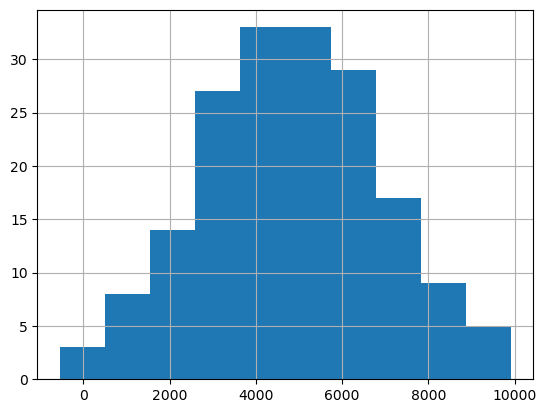

In [4]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

### Probabilities from the normal distribution

In [10]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


### Simulating sales under new market conditions

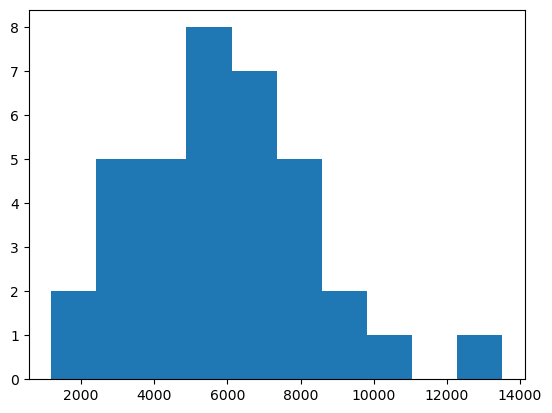

In [11]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

### Which market is better?

In [14]:
print(1 - norm.cdf(1000, 5000, 2000))
print(1 - norm.cdf(1000, 6000 , 2600))

0.9772498680518208
0.9727648049862613


## The central limit theorem

### The CLT in action

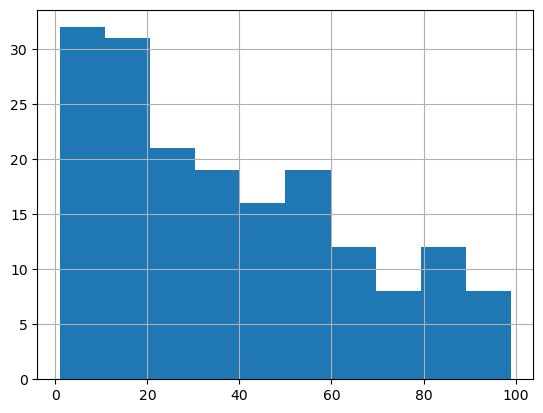

32.0


In [18]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(samp_20.mean())

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


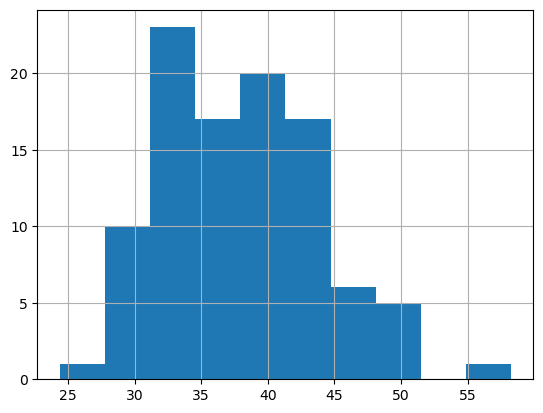

In [23]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = samp_20.mean()
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

### The mean of means

In [25]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = cur_sample.mean()
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(amir_deals['num_users'].mean())

38.31333333333332
37.651685393258425


## The Poisson distribution

### Tracking lead responses

In [29]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


### More probability distributions

### Modeling time between leads

In [34]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) -expon.cdf(3, scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684
